# Seminar 1. Machine learning on Titanic data

The notebook provides an intro to the exploratory analysis of the data, data preprocessing and application of machine learning methods.

The notebook is based on kaggle kernel "Titanic: Machine Learning from Disaster"  https://www.kaggle.com/omarelgabry/a-journey-through-titanic by Omar El Gabry.
Data is from a toy competition on kaggle named Titanic.
The goal of the competition is to predict who survived and who died during the sinking of the RMS Titanic.


**Workshop Plan**

1. Exploration data analysis
2. Data Preprocessing
3. Your first machine learning model

### Documentation to go through:

* https://docs.python.org/3/
* https://pandas.pydata.org/docs
* https://matplotlib.org/contents.html
* https://docs.scipy.org/doc/
* http://scikit-learn.org/stable/documentation.html

### Some additional info:


* http://www.scipy-lectures.org/
* https://www.kaggle.com/
* https://pydata.org/

Feature Description:

* *PassengerId* - id of the passenger

* *Survived*-  binary variable: passenger survived (1) or not (0)

* *Pclass* - passenger class

* *Name* - passenger's name

* *Sex* - passenger's gender

* *Age* - passenger's age

* *SibSp* - number of relatives (brothers, sisters, spouses) of the passenger on board

* *Parch* - number of relatives (parents/children) of the passenger on board

* *Ticket* - ticket number

* *Fare* - fare

* *Cabin* - cabin number

* *Embarked* - port where the passenger boarded the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

importing data processing tools:
- **pandas:** working with tables
- **numpy:** working with numerical calculations
- **matplotlib** and **seaborn**: data visualizations

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

get titanic files as a DataFrame

In [ ]:
titanic_dataframe = pd.read_csv("https://raw.githubusercontent.com/adasegroup/ML2024_seminars/master/seminar1/titanic/train.csv", index_col='PassengerId')

preview the data
head() shows the first lines of the dataframe

In [ ]:
titanic_dataframe.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Pandas work

you can see the latest entries in the columns

In [ ]:
titanic_dataframe.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


the shape shows the dimension of the dataframe

In [ ]:
titanic_dataframe.shape

(891, 11)

In [ ]:
titanic_dataframe.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

column selection by name

In [ ]:
titanic_dataframe['Age']

,Age
PassengerId,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0
...,...
887,27.0
888,19.0
889,NaN


row selection by id

In [ ]:
titanic_dataframe.loc[1]

,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25
Cabin,NaN


column selection by index

In [ ]:
titanic_dataframe.iloc[:, 0]

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


row selection by index

In [ ]:
titanic_dataframe.iloc[0, :]

,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25
Cabin,NaN


select objects that satisfy some properties

all passengers are female:

In [ ]:
women_data = titanic_dataframe[titanic_dataframe['Sex'] == 'female']
women_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


First or second class passengers:

In [ ]:
titanic_dataframe[titanic_dataframe['Pclass'].isin([1, 2])].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Sometimes we need to create a new attribute from existing ones, for example, we want to know how many relatives traveled with each passenger - just add the SibSp and Parch columns and put the sum into a new FamilySize column. Such a procedure is called broadcasting.

In [ ]:
titanic_dataframe['Family_Size'] = titanic_dataframe['SibSp'] + titanic_dataframe['Parch']
titanic_dataframe.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2


delete the column that carries no information

In [ ]:
titanic_dataframe.drop(['Ticket', 'Name'], axis=1, inplace=True)

sort values by age

In [ ]:
titanic_dataframe.sort_values(by=['Age']).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,
804,1,3,male,0.42,0,1,8.5167,NaN,C,1
756,1,2,male,0.67,1,1,14.5000,NaN,S,2
645,1,3,female,0.75,2,1,19.2583,NaN,C,3
470,1,3,female,0.75,2,1,19.2583,NaN,C,3
79,1,2,male,0.83,0,2,29.0000,NaN,S,2


Caculating statistics

In [ ]:
titanic_dataframe['Fare'].mean()

32.204207968574636

splitting all objects into 2 groups by gender - returns grouped dataframe


In [ ]:
titanic_dataframe.groupby('Sex')

grouped by gender and counted for each passenger of different classes

In [ ]:
titanic_dataframe.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: count, dtype: int64

###Task 1

Calculate the average age of passengers (Age) who survived (Survived = 1). Use data filtering to complete the task.


In [ ]:
#survived_passengers = df[df['Survived'] == 1]
# average_age_survived = survived_passengers['Age'].mean()

###Task 2

In which port of embarkation (Embarked) was the absolute difference between the number of men and women the greatest?

In the Titanic dataset, the Embarked column indicates the port where the passenger boarded (S = Southampton, C = Cherbourg, Q = Queenstown).

The Sex column indicates the passenger's gender (male = man, female = woman).

***You need to:***

For each port (Embarked), count the number of men and women.

Calculate the absolute difference between the number of men and women for each port.

Determine which port had the greatest difference.

In [ ]:
#titanic_dataframe.groupby(["Embarked", "Sex"]).count()

Select the 'Pclass' and 'Age' columns from the DataFrame 'data' and group the data by 'Pclass'.


Then calculate the average age ('Age') for each 'Pclass' group.


Select the 'Pclass' and 'Age' columns from DataFrame 'data' and group the data by 'Pclass'.


Then calculate the standard deviation of age ('Age') for each 'Pclass' group.

In [ ]:
titanic_dataframe[['Pclass', 'Age']].groupby('Pclass').agg(['mean', 'std'])

Age           
             mean        std
Pclass                      
1       38.233441  14.802856
2       29.877630  14.001077
3       25.140620  12.495398

# EDA

In [ ]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Family_Size  891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 108.9+ KB


Pandas has a describe() function that makes a handy summary table of all quantitative columns at once (note that for Pandas, quantitative data = anything represented by numbers):

count: The number of non-null (non-missing) values in the column.

mean: The average value of the column.

std: The standard deviation, which measures the amount of variation or dispersion in the data.

min: The smallest value in the column.

25%: The 25th percentile (first quartile), meaning 25% of the data falls below this value.

50%: The 50th percentile (median), meaning 50% of the data falls below this value.

75%: The 75th percentile (third quartile), meaning 75% of the data falls below this value.

max: The largest value in the column.

In [ ]:
titanic_dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


These descriptive statistics can be calculated without using the `describe` method:  
- **median** — the median (equivalent to 50% in `describe()`).  
- **mode** — the mode (the most frequently occurring value).  
- **var** — the variance.  
- **skew** — the skewness coefficient (a measure of asymmetry).  
- **kurtosis** — the kurtosis coefficient (a measure of the "tailedness" or peakness of the distribution).  
- **sum** — the sum of values.  
- **quantile(q)** — the value for a given quantile `q` (e.g., 0.1 for the 10th percentile).  
- **range** — the difference between the maximum and minimum values.

## Data visualization

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')
# %matplotlib inline


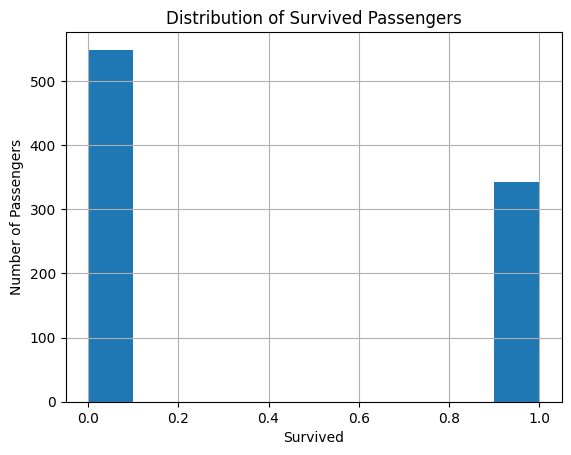

In [ ]:
titanic_dataframe['Survived'].hist()
plt.title('Distribution of Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

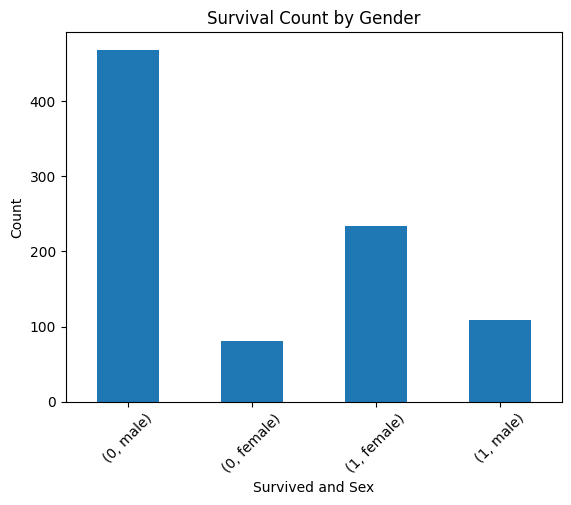

In [ ]:
titanic_dataframe.groupby('Survived')['Sex'].value_counts().plot(kind='bar')
plt.title('Survival Count by Gender')
plt.xlabel('Survived and Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

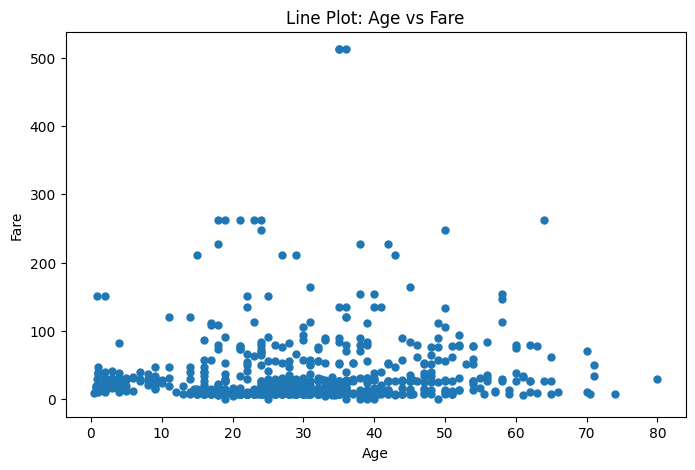

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(titanic_dataframe['Age'], titanic_dataframe['Fare'], 'o', markersize=5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Line Plot: Age vs Fare')
plt.show()

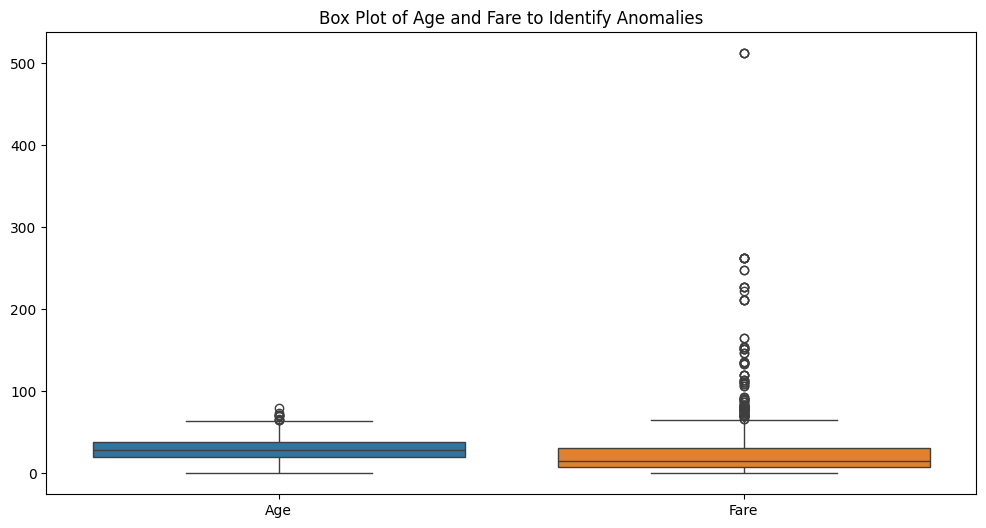

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_dataframe[['Age', 'Fare']])
plt.title('Box Plot of Age and Fare to Identify Anomalies')
plt.show()

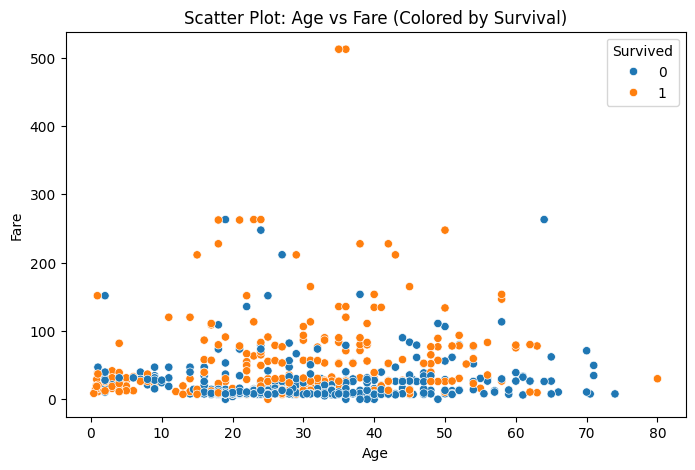

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_dataframe)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare (Colored by Survival)')
plt.show()

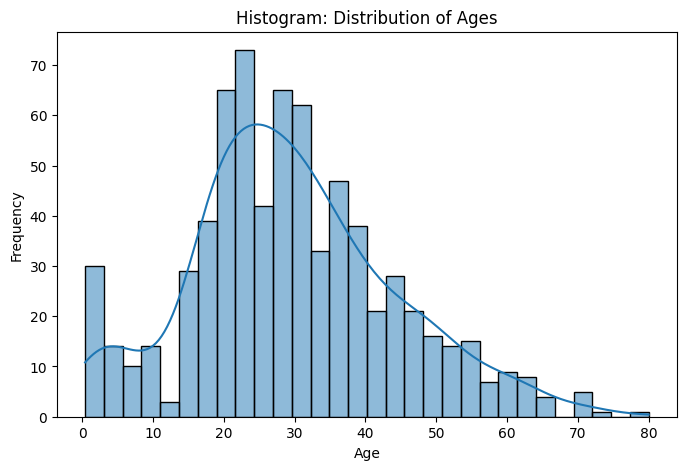

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_dataframe['Age'].dropna(), bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Ages')
plt.show()

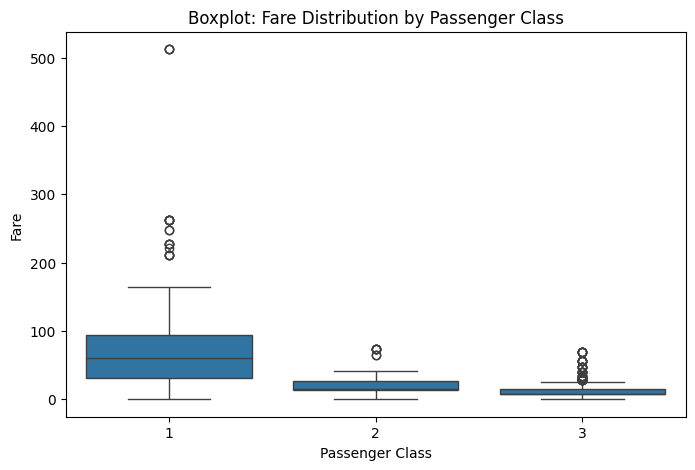

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=titanic_dataframe)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Boxplot: Fare Distribution by Passenger Class')
plt.show()

Multiplot (Subplots): Age and Fare Distributions

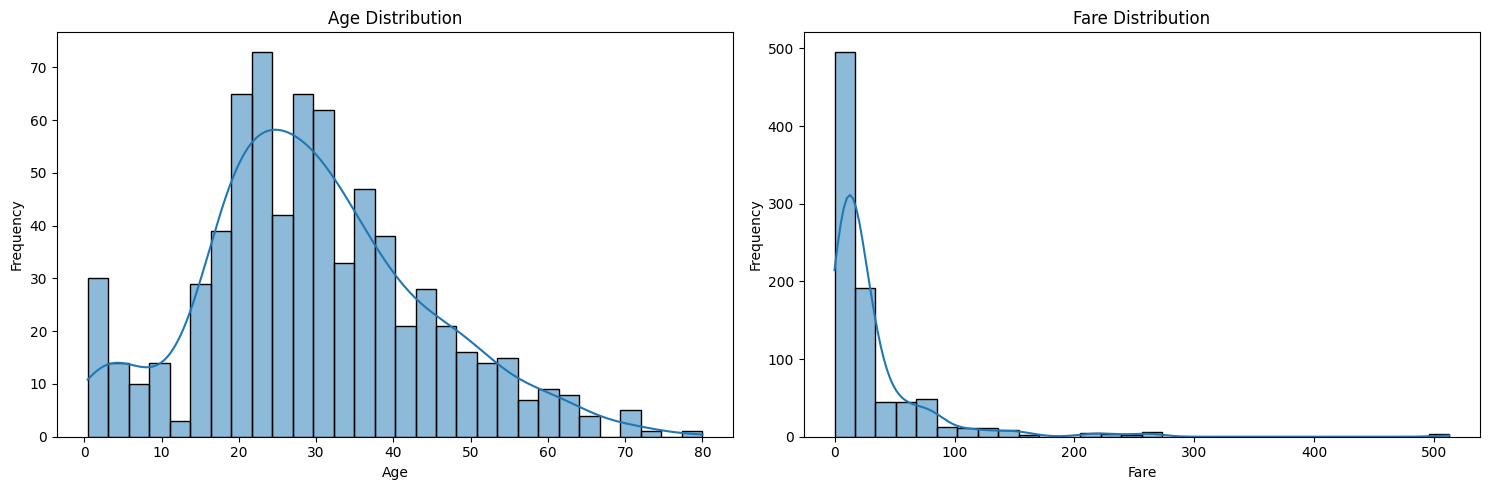

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Age Distribution
sns.histplot(titanic_dataframe['Age'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution')

# Subplot 2: Fare Distribution
sns.histplot(titanic_dataframe['Fare'].dropna(), bins=30, kde=True, ax=axes[1])
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Fare Distribution')

plt.tight_layout()
plt.show()


the column does not provide useful information

### Task 3

Is distribution of age similar for men and women? Build histograms in two seperate subplots.


In [ ]:
# gender_titanic1 = titanic_dataframe[titanic_dataframe.Sex == "male"]
# gender_titanic2 = titanic_dataframe[titanic_dataframe.Sex == "female"]

# fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

# axis1.set_title('Age histogram - Titanic, male')
# axis2.set_title('Age histogram - Titanic, female')

# gender_titanic1["Age"].hist(ax = axis1, bins = 50)
# gender_titanic2["Age"].hist(ax = axis2, bins = 50)

## Correlation

In [ ]:
titanic_dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,1
2,1,1,female,38.0,1,0,71.2833,C85,C,1
3,1,3,female,26.0,0,0,7.9250,NaN,S,0
4,1,1,female,35.0,1,0,53.1000,C123,S,1
5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [ ]:
numerical_features = titanic_dataframe[['Pclass', 'Age', 'Fare', 'Family_Size']]

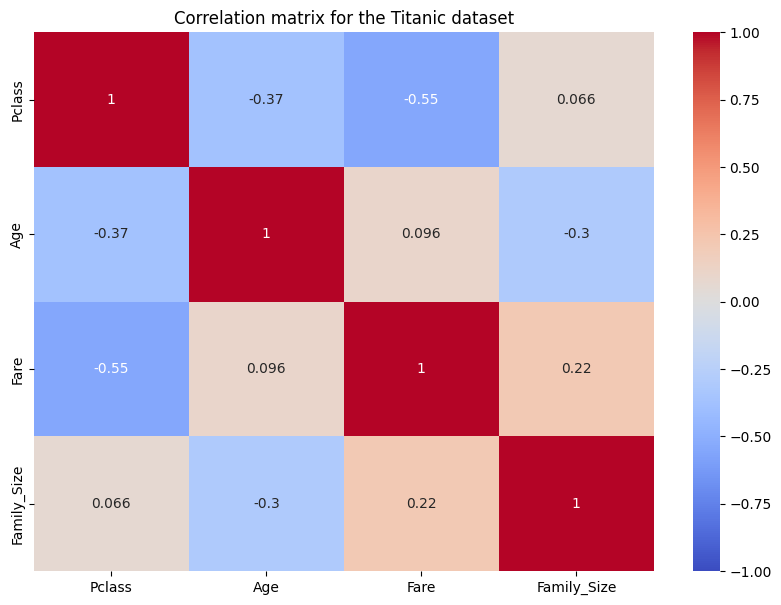

In [ ]:
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix for the Titanic dataset')
plt.show()

There are no uncorrelated features in the data.

# Preprocessing

In [ ]:
titanic_dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,1
2,1,1,female,38.0,1,0,71.2833,C85,C,1
3,1,3,female,26.0,0,0,7.9250,NaN,S,0
4,1,1,female,35.0,1,0,53.1000,C123,S,1
5,0,3,male,35.0,0,0,8.0500,NaN,S,0


## Duplicates

Cheking duplicates

In [ ]:
titanic_dataframe.duplicated().sum()

107

We have duplicated columns. We need to drop duplicates from our dataset

In [ ]:
titanic_dataframe.drop_duplicates(inplace=True)
titanic_dataframe.duplicated().sum()

0

## Working with NA

In [ ]:
titanic_dataframe.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,106
SibSp,0
Parch,0
Fare,0
Cabin,581
Embarked,2
Family_Size,0


It has a lot of NaN values, so it won't cause a remarkable impact on prediction

In [ ]:
titanic_dataframe.drop("Cabin", axis=1, inplace=True)

Fill the two missing values with the most occurred value, which is "S".

In [ ]:
embark_mode = titanic_dataframe["Embarked"].mode().values[0]
print(embark_mode)

S


In [ ]:
titanic_dataframe["Embarked"].fillna(embark_mode, inplace=True)

# Count various embarked values
titanic_dataframe["Embarked"].value_counts()

<ipython-input-43-accf74b6ba1d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataframe["Embarked"].fillna(embark_mode, inplace=True)


,count
Embarked,
S,570
C,155
Q,59


Fill numerous NA with random value between mean

In [ ]:
average_age_titanic = titanic_dataframe["Age"].mean()
std_age_titanic = titanic_dataframe["Age"].std()

count_nan_age_titanic = titanic_dataframe["Age"].isnull().sum()
random_ages = np.random.randint(
    average_age_titanic - std_age_titanic,
    average_age_titanic + std_age_titanic,
    size=count_nan_age_titanic
)

titanic_dataframe.loc[np.isnan(titanic_dataframe["Age"]), "Age"] = random_ages
titanic_dataframe['Age'] = titanic_dataframe['Age'].astype(int)

## Feature engineering

Create a new feature 'Family'

In [ ]:
titanic_dataframe['Family'] = titanic_dataframe["Parch"] + titanic_dataframe["SibSp"]
titanic_dataframe.loc[titanic_dataframe['Family'] > 0, 'Family'] = 1

Drop the 'SibSp' and 'Parch' columns

In [ ]:
titanic_dataframe.drop(['SibSp', 'Parch'], axis=1, inplace=True)

Classify passengers as 'child', 'female', or 'male'

In [ ]:
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

In [ ]:
titanic_dataframe['Person'] = titanic_dataframe[['Age', 'Sex']].apply(get_person, axis=1)
titanic_dataframe.drop('Sex', axis=1, inplace=True)

 Encode categorical variables

In [ ]:
titanic_dataframe_prev = titanic_dataframe.copy()
titanic_dataframe_prev

,Survived,Pclass,Age,Fare,Embarked,Family_Size,Family,Person
PassengerId,,,,,,,,
1,0,3,22,7.2500,S,1,1,male
2,1,1,38,71.2833,C,1,1,female
3,1,3,26,7.9250,S,0,0,female
4,1,1,35,53.1000,S,1,1,female
5,0,3,35,8.0500,S,0,0,male
...,...,...,...,...,...,...,...,...
886,0,3,39,29.1250,Q,5,1,female
888,1,1,19,30.0000,S,0,0,female
889,0,3,31,23.4500,S,3,1,female


## Encoding categorical variables

In [ ]:
titanic_dataframe.head()

,Survived,Pclass,Age,Fare,Embarked,Family_Size,Family,Person
PassengerId,,,,,,,,
1,0,3,22,7.2500,S,1,1,male
2,1,1,38,71.2833,C,1,1,female
3,1,3,26,7.9250,S,0,0,female
4,1,1,35,53.1000,S,1,1,female
5,0,3,35,8.0500,S,0,0,male


In [ ]:
titanic_dataframe = titanic_dataframe.copy()

titanic_dataframe = pd.get_dummies(
    titanic_dataframe,
    columns=['Embarked', 'Person'],
    drop_first=True
)

# Your first machine learning model

![MLearning](https://media.giphy.com/media/BdrSy2gqURFEk/giphy.gif)

In [ ]:
titanic_dataframe.head()

,Survived,Pclass,Age,Fare,Family_Size,Family,Embarked_Q,Embarked_S,Person_female,Person_male
PassengerId,,,,,,,,,,
1,0,3,22,7.2500,1,1,False,True,False,True
2,1,1,38,71.2833,1,1,False,False,True,False
3,1,3,26,7.9250,0,0,False,True,True,False
4,1,1,35,53.1000,1,1,False,True,True,False
5,0,3,35,8.0500,0,0,False,True,False,True


# data splitting

Split the data into features (X) and target (y)


X — all columns except 'Survived', as this is the target variable


y — the 'Survived' column, which we aim to predict

machine learning tools: various methods from scikit-learn

In [ ]:
X = titanic_dataframe.drop(['Survived'], axis=1)  # Features
y = titanic_dataframe['Survived']  # Target variable

Split the data into training and testing sets


train_size = 0.8 — 80% of the data will be used for training, 20% for testing


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
# Important: Fit only on the training data to avoid data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Now X_train_scaled and X_test_scaled are normalized

## Model training

Initialize sklearn model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

fitting sklearn model

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Get prediction from sklearn models

In [ ]:
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

In [ ]:
print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.9840510366826156
Testing Accuracy: 0.7388535031847133


### Task 5

Try to use different number of neightbours. What number have the best quality on the test data?

In [ ]:
# accuracies = []
# possible_n = [1, 2, 3, 5, 7, 10, 15, 20, 40, 100]

# for n_neigh in possible_n:
#     knn_model = KNeighborsClassifier(n_neighbors=n_neigh)
#     knn_model.fit(X_train, y_train)
#     y_pred = knn_model.predict(X_test)
#     test_accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(test_accuracy)

# plt.plot(possible_n, accuracies)
# plt.show()

# Conclusions

In this seminar we:
- got acquainted with python for data analysis
- learned how to study data in python
- prepared the data for analysis
- trained our first machine learning model